In [54]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

### Importance Sampling

Using sampling to approximate a distribution

$$E[f(x)] = \int f(x)p(x) dx \approx \frac{1}{n}\sum_{i} f(x_i)$$
where $ x \sim p(x)$


Using another distribution $ q(x)$ - the so-called “importance function”, we can rewrite the above expression


$$E[f(x)] = \int f(x)p(x) dx = \int f(x)\frac{p(x)}{q(x)}q(x) dx \approx \frac{1}{n} \sum_{i} f(x_i)\frac{p(x_i)}{q(x_i)}$$
where $ x \sim q(x)$

Idea of importance sampling: 

draw the sample from a proposal distribution and re-weight the integral using importance weights so that the correct distribution is targeted

$$Var(X) = E[X^2] - E[X]^2$$

Define a some function of X

In [49]:
def f_x(x):
    return 1/(1 + np.exp(-x))

x = np.linspace(0,4, 50)
y = f_x(x)

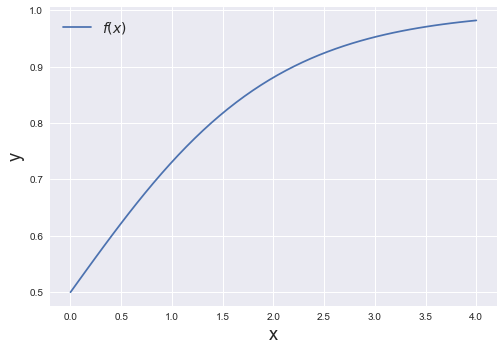

In [52]:
plt.plot(x, y, label = "$f(x)$")
plt.legend()
plt.xlabel("x", size=18)
plt.ylabel("y", size=18)
plt.legend(prop={"size": 14})

Univariate normal distribution with different parameter values

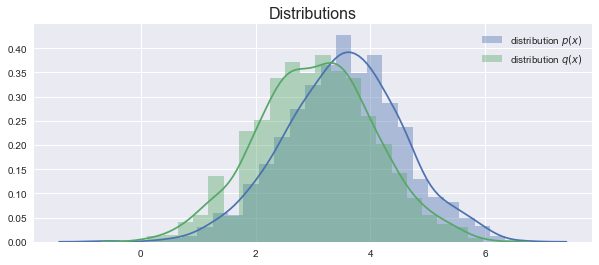

In [141]:
def target_distribution(mu=0, sigma=1):
    # return probability given a value
    distribution = stats.norm(mu, sigma)
    return distribution

# def imp_func(mu=0, sigma=1):
#     # return probability given a value
#     distribution = stats.t(mu, sigma)
#     return distribution
    
# pre-setting
n = 5000

mu_target = 3.5
sigma_target = 1
mu_appro = 3
sigma_appro = 1

p_x = target_distribution(mu_target, sigma_target)
q_x = target_distribution(mu_appro, sigma_appro)


plt.figure(figsize=[10, 4])

sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(1000)], label="distribution $p(x)$")
sns.distplot([np.random.normal(mu_appro, sigma_appro) for _ in range(1000)], label="distribution $q(x)$")

# sns.distplot([stats.t.rvs(mu_appro, sigma_appro) for _ in range(1000)], label="distribution $q(x)$")

plt.title("Distributions", size=16)
plt.legend()

In [143]:
s = 0
value_list = []
for i in range(n):
    # draw a sample
    x_i = np.random.normal(mu_target, sigma_target)
    s += f_x(x_i)
    value_list.append(f_x(x_i))

# print("simulate value", s/n)
print("Target value average {} variance {}".format(np.mean(value_list), np.var(value_list)))

value_list = []
for i in range(n):
    
    # sample from different distribution
    x_i = np.random.normal(mu_appro, sigma_appro)

    
    # importance sampling formula
    value = f_x(x_i)*(p_x.pdf(x_i) / q_x.pdf(x_i))
    
    value_list.append(value)
print("Simulated value average {} variance {}".format(np.mean(value_list), np.var(value_list)))


Target value average 0.9550350068797084 variance 0.0023120805579870964
Simulated value average 0.9419270538466505 variance 0.2924579320956301


As the ratio of p(x)/q(x) was small, the variance in the approximation is not huge 

Lets plot below how are the samples from different target and approximate distributions

Text(0.5, 1.0, 'Gaussian sampling')

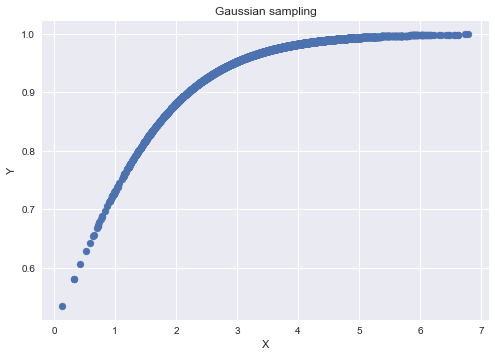

In [162]:
x = []
y = []
for i in range(n):
    # draw a sample
    x_i = np.random.normal(mu_target, sigma_target)
    x.append(x_i)
#     s += f_x(x_i)
    y.append(f_x(x_i))
    
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian sampling')

Text(0.5, 1.0, 'Importance sampling')

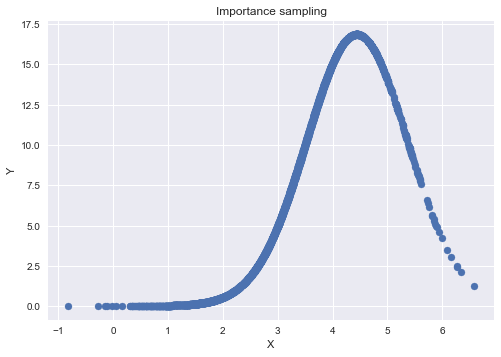

In [160]:
simulated_x = []
simulated_y = []
for i in range(n):
    
    # sample from different distribution
    x_i = np.random.normal(mu_appro, sigma_appro)

    simulated_x.append(x_i)
    # importance sampling formula
    value = f_x(x_i)*(p_x.pdf(x_i) / q_x.pdf(x_i))
    
    simulated_y.append(value)
    
plt.scatter(simulated_x, simulated_y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Importance sampling')

Univariate normal and T distribution

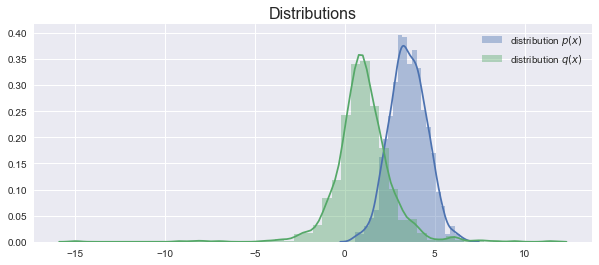

In [146]:
def target_distribution(mu=0, sigma=1):
    # return probability given a value
    distribution = stats.norm(mu, sigma)
    return distribution

def imp_func(mu=0, sigma=1):
    # return probability given a value
    distribution = stats.t(mu, sigma)
    return distribution
    
# pre-setting
n = 5000

mu_target = 3.5
sigma_target = 1
mu_appro = 3
sigma_appro = 1

p_x = target_distribution(mu_target, sigma_target)
q_x = imp_func(mu_appro, sigma_appro)


plt.figure(figsize=[10, 4])

sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(1000)], label="distribution $p(x)$")
sns.distplot([stats.t.rvs(mu_appro, sigma_appro) for _ in range(1000)], label="distribution $q(x)$")

plt.title("Distributions", size=16)
plt.legend()

In [164]:
s = 0
value_list = []
for i in range(n):
    # draw a sample
    x_i = np.random.normal(mu_target, sigma_target)
    s += f_x(x_i)
    value_list.append(f_x(x_i))

# print("simulate value", s/n)
print("Target value average {} variance {}".format(np.mean(value_list), np.var(value_list)))

approx_x =[]
value_list = []
for i in range(n):
    
    # sample from different distribution
    x_i = stats.t.rvs(mu_appro, sigma_appro)
    approx_x.append(x_i)

    
    # importance sampling formula
    value = f_x(x_i)*(p_x.pdf(x_i) / q_x.pdf(x_i))
    
    value_list.append(value)
print("Simulated value average {} variance {}".format(np.mean(value_list), np.var(value_list)))


Target value average 0.9552577958838181 variance 0.0021796653479284785
Simulated value average 0.9692355187891755 variance 8.029547981033648


Text(0.5, 1.0, 'Importance sampling')

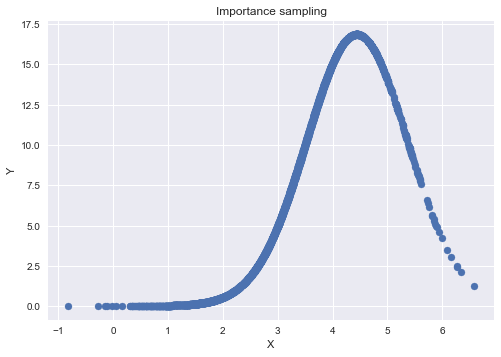

In [166]:
plt.scatter(simulated_x, simulated_y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Importance sampling')

## Latin Hypercube Sampling

The LHS design is a statistical method for generating a quasi-random sampling distribution. It is among the most popular sampling techniques in computer experiments thanks to its simplicity and projection properties with high-dimensional problems. LHS is built as follows: we cut each dimension space, which represents a variable, into n sections where n is the number of sampling points, and we put only one point in each section.

(10, 2)


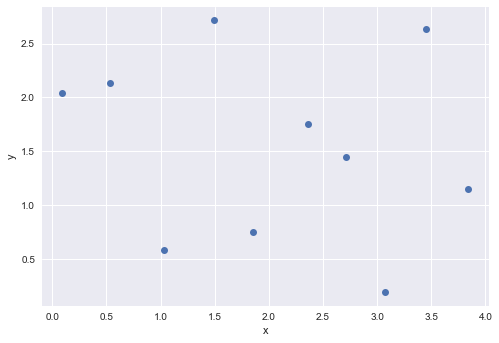

In [173]:
import numpy as np
import matplotlib.pyplot as plt

from smt.sampling_methods import LHS

xlimits = np.array([[0.0, 4.0], [0.0, 3.0]])
sampling = LHS(xlimits=xlimits, criterion='corr')

num = 10
x = sampling(num)

print(x.shape)

plt.plot(x[:, 0], x[:, 1], "o")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [177]:
# design = LHS(4, samples=10)
# from scipy.stats.distributions import norm
# means = [1, 2, 3, 4]
# stdvs = [0.1, 0.5, 1, 0.25]
# for i in xrange(4):
#     design[:, i] = norm(loc=means[i], scale=stdvs[i]).ppf(design[:, i])

References:
    1. https://towardsdatascience.com/importance-sampling-introduction-e76b2c32e744
    2. https://mathieu.fenniak.net/latin-hypercube-sampling/#:~:text=Latin%20hypercube%20sampling%20(LHS)%20is,be%20applied%20to%20multiple%20variables.&text=The%20concept%20behind%20LHS%20is,calculation%20of%20the%20target%20function.